In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)
help(del_gn

 # Let us try RE2NFA and then NFA2RE

In [2]:
NFA_of_RE = re2nfa("(a+b)(cd)*")

Generating LALR tables


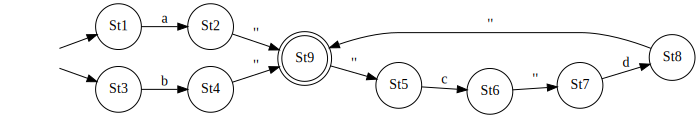

In [3]:
dotObj_nfa(NFA_of_RE)

In [4]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [5]:
GNFA_of_RE = mk_gnfa(NFA_of_RE)

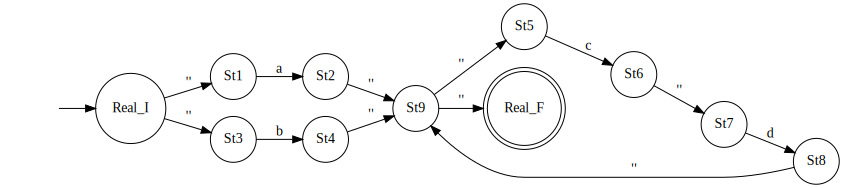

In [6]:
dotObj_gnfa(GNFA_of_RE)

In [7]:
(Gfinal, dotObj_List, final_re_str) = del_gnfa_states(GNFA_of_RE)

**** Eliminating state St6 ****
**** Eliminating state St1 ****
**** Eliminating state St7 ****
**** Eliminating state St9 ****
**** Eliminating state St2 ****
**** Eliminating state St4 ****
**** Eliminating state St5 ****
**** Eliminating state St8 ****
**** Eliminating state St3 ****


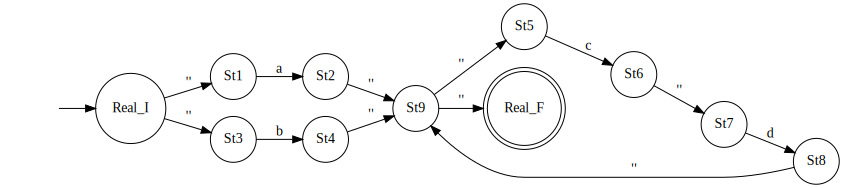

In [8]:
dotObj_List[0]

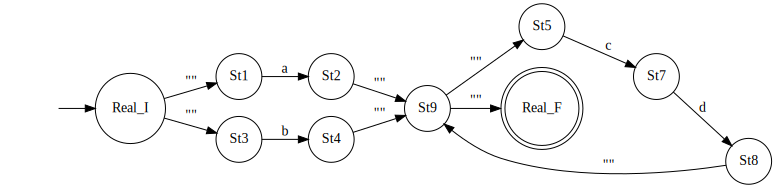

In [9]:
dotObj_List[1]

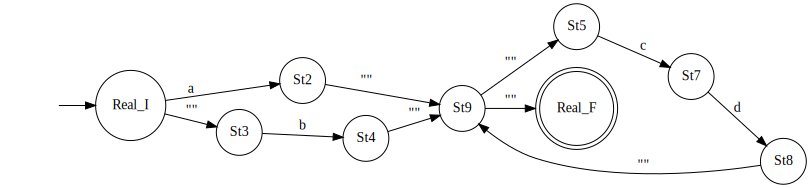

In [10]:
dotObj_List[2]

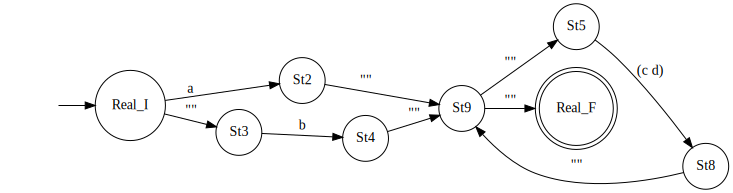

In [11]:
dotObj_List[3]

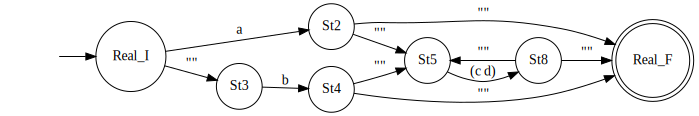

In [12]:
dotObj_List[4]

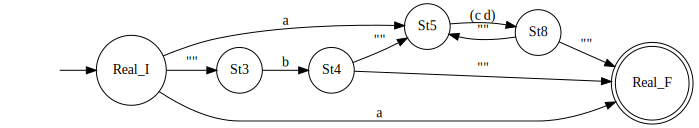

In [13]:
dotObj_List[5]

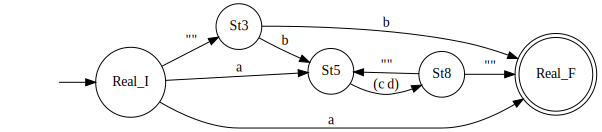

In [14]:
dotObj_List[6]

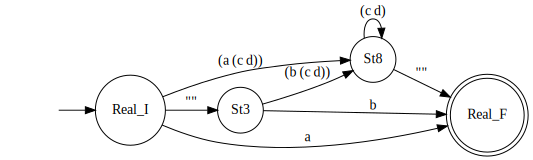

In [15]:
dotObj_List[7]

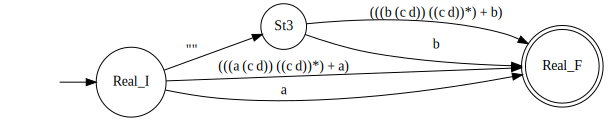

In [16]:
dotObj_List[8]

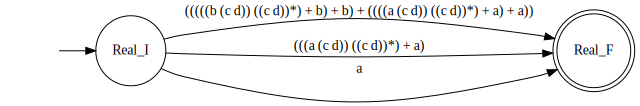

In [17]:
dotObj_List[9]

In [18]:
final_re_str

'((((((b (c d)) ((c d))*) + b) + b) + ((((a (c d)) ((c d))*) + a) + a)) + ((((a (c d)) ((c d))*) + a) + a))'

In [19]:
mDFA_final_re_str = min_dfa(nfa2dfa(re2nfa(final_re_str)))

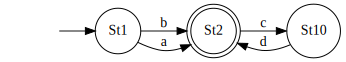

In [20]:
dotObj_dfa(mDFA_final_re_str)

In [21]:
mDFA_NFA_of_RE = min_dfa(nfa2dfa(re2nfa("(a+b)(cd)*")))

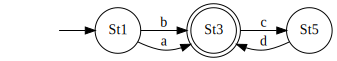

In [22]:
dotObj_dfa(mDFA_NFA_of_RE)

In [23]:
iso_dfa(mDFA_final_re_str, mDFA_NFA_of_RE)

True

# The Min-DFAs agree; so the conversions are correct